In [31]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\programdata\anaconda3\lib\site-packages (0.1.63)
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns
import yfinance as yf

In [33]:
# Download and preprocess the prices of S&P 500 and VIX
df = yf.download ( ["^GSPC", "^VIX"], start = "1985-01-01", end =  "2020-12-31", progrss = False)
df = df[ [ "Adj Close"]]
df.columns = df.columns.droplevel (0)
df = df.rename (columns = { "^GSPC" : "sp500", "^VIX" : "vix"})
df

[*********************100%***********************]  2 of 2 completed


,sp500,vix
Date,,
1984-12-31,167.240005,NaN
1985-01-02,165.369995,NaN
1985-01-03,164.570007,NaN
1985-01-04,163.679993,NaN
1985-01-07,164.240005,NaN
...,...,...
2020-12-23,3690.010010,23.309999
2020-12-24,3703.060059,21.530001
2020-12-28,3735.360107,21.700001


In [34]:
# Calculate the log returns 
df ["log_rtn"] = np.log(df.sp500 / df.sp500.shift(1))
df ["vol_rtn"] = np.log(df.vix / df.vix.shift(1))
df.dropna(how = "any", axis = 0, inplace = True)

[Text(0.5, 1.0, 'S&P 500 vs. VIX ($\\rho$ = -0.71)'),
 Text(0, 0.5, 'VIX log returns'),
 Text(0.5, 0, 'S&P 500 log returns')]

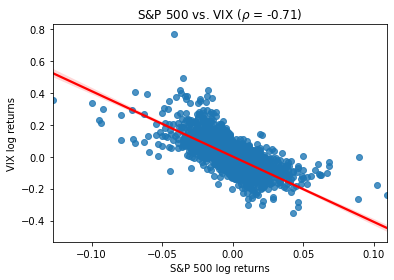

In [35]:
# Plot a scatterplot with the returns on the axes 
# Fit a regression line to identify the trend 

corr_coeff = df.log_rtn.corr (df.vol_rtn)

ax = sns.regplot (x = "log_rtn", y = "vol_rtn", data = df, line_kws = {"color": "red"})

ax.set (title = f"S&P 500 vs. VIX ($\\rho$ = {corr_coeff: .2f})", ylabel = "VIX log returns", xlabel = "S&P 500 log returns")

